In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/migration-nz/migration_nz.csv


### Imports

In [230]:
### TENSORFLOW ###
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

### OTHERS ###
import matplotlib.pyplot as plt
import seaborn as sns
import tabulate as tbl

In [3]:
# Data set
data = pd.read_csv("/kaggle/input/migration-nz/migration_nz.csv", header = 0)

# View
data.head(1)

,Measure,Country,Citizenship,Year,Value
0,Arrivals,Oceania,New Zealand Citizen,1979,11817.0


In [188]:
# Color palette
palette = sns.color_palette("viridis")

# Data Exploration

Data set contents:
- 5 columns
- 86,526 records

In [12]:
# Size
print(f'There are {data.shape[0]} rows across {data.shape[1]} columns.')

There are 86526 rows across 5 columns.


In [18]:
# Checking dtype and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86526 entries, 0 to 86525
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Measure      86526 non-null  object 
 1   Country      86526 non-null  object 
 2   Citizenship  86526 non-null  object 
 3   Year         86526 non-null  int64  
 4   Value        86454 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 3.3+ MB


In [25]:
# For each object dtype, return the unique values
for cols in data.columns:
    if data[cols].dtype == 'object' or data[cols].dtype == 'int64':
        print(f'{cols}: {data[cols].nunique()}')

Measure: 3
Country: 253
Citizenship: 3
Year: 38


In [45]:
# Unique Values - Measure
print(f'Measure unique values:\n{data.Measure.value_counts()}')

Measure unique values:
Arrivals      28842
Departures    28842
Net           28842
Name: Measure, dtype: int64


In [46]:
# Unique Values - Year
print(f'Year unique values:\n{data.Year.value_counts()}')

Year unique values:
1979    2277
2007    2277
2000    2277
2001    2277
2002    2277
2003    2277
2004    2277
2005    2277
2006    2277
2008    2277
1980    2277
2009    2277
2010    2277
2011    2277
2012    2277
2013    2277
2014    2277
2016    2277
1999    2277
1998    2277
1997    2277
1996    2277
1981    2277
1982    2277
1983    2277
1984    2277
1985    2277
1986    2277
1987    2277
1988    2277
1989    2277
1990    2277
1991    2277
1994    2277
1992    2277
1993    2277
1995    2277
2015    2277
Name: Year, dtype: int64


In [47]:
# Unique Values - Country
print(f'Country unique values:\n{data.Country.value_counts()}')

Country unique values:
Oceania              342
US Virgin Islands    342
Puerto Rico          342
Paraguay             342
Suriname             342
                    ... 
Greece               342
Croatia              342
Hungary              342
Ireland              342
All countries        342
Name: Country, Length: 253, dtype: int64


Within Measure, there are three categories:
- Arrivals, for individuals arriving to New Zealand.
- Departures, for individuals leaving New Zealand.
- Net, the difference between arrivals and departures.

There is an interesting question to ask about the Net migration per year in the timeframe of 1979 thru 2016.

In [40]:
# Summary of Value
data.Value.describe()

count     86454.000000
mean        254.669304
std        3123.604622
min      -42627.000000
25%           0.000000
50%           0.000000
75%           6.000000
max      127305.000000
Name: Value, dtype: float64

## Visualizations

Visualizations will be most effective when looking at the intersections of categorical variables. Example: Arrivals by year.

In [123]:
# Years
years = [*data.Year.unique()]

# Measures
measures = [*data.Measure.unique()]

In [125]:
# Function to calculate measure sum based on year
def measurePerYear(measure, year):
    # Summation
    #this_sum = int(data['Value'].loc[(data['Measure']==measure) & (data['Year']==year)].sum())
    # Return
    return int(data['Value'].loc[(data['Measure']==measure) & (data['Year']==year)].sum())

In [139]:
### Measures per year
# Lists
arrivals_per_year = []
departures_per_year = []
net_per_year = []

# Iterate to calculate
for y in years:
    arrivals_per_year.append(measurePerYear('Arrivals', y))
    departures_per_year.append(measurePerYear('Departures', y))
    net_per_year.append(measurePerYear('Net', y))

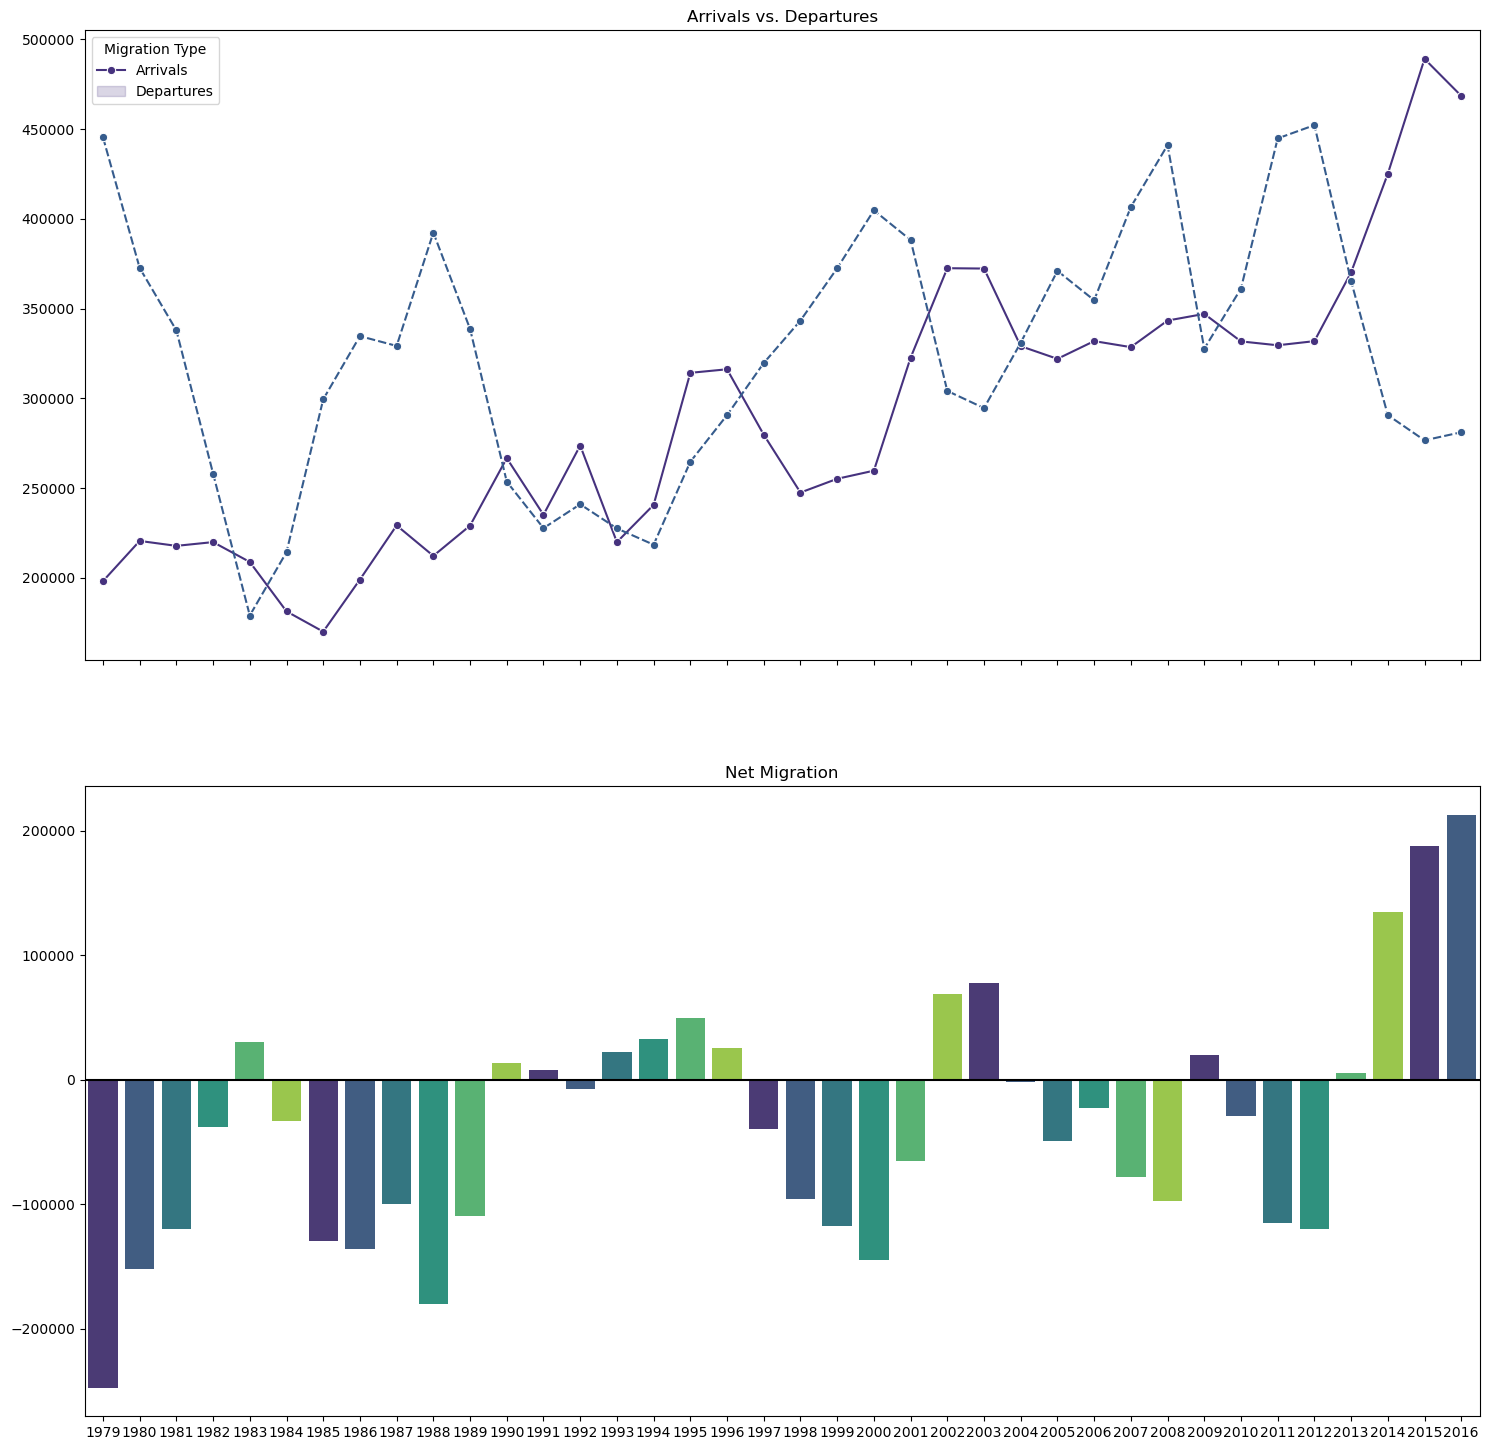

In [216]:
### Arrivals vs. Departures vs. Net
# Make subplots
fig, (ax0, ax1) = plt.subplots(nrows=2, figsize = (18,18), sharex = True)

# Plots
sns.lineplot(data = [arrivals_per_year, departures_per_year],
             marker = "o",
             linestyle = 'dashed',
             palette = [palette[0], palette[1]],
             ax = ax0)
# Set the line chart title
ax0.set_title('Arrivals vs. Departures')
# Fix the legend
ax0.legend(title = "Migration Type", labels = ['Arrivals', 'Departures'])

# Centered barplot
sns.barplot(x=years, y=net_per_year, palette=palette, ax=ax1)
# Center the axis
ax1.axhline(0, color = "black")
# Set the title for the barplot
ax1.set_title("Net Migration")

# View
fig.show()

In [249]:
### Create a table for plain language
